In [1]:
%load_ext autoreload
%autoreload 2
from WST import WST
import os

In [2]:
# extract the name of the file
col_group = ['Date', 'Class', 'Stress_weight', 'Position']
file_name = '10_SG1_MSC/CARS'
path = os.path.join(os.path.abspath(os.getcwd()), file_name)
c = WST(path, MAX_COMPONENTS=10, col_group=col_group, cutoff=0.5)

Training/Testing split: 70.0% training, 30.0% testing
Training samples: 134
Testing samples: 58

Train/Test split by Class and Stress_weight:
  Class Controlled (C), Stress_weight 20: 22 train, 9 test
  Class Controlled (C), Stress_weight 40: 20 train, 9 test
  Class Controlled (C), Stress_weight 60: 21 train, 9 test
  Class Stressed Water (W), Stress_weight 20: 24 train, 10 test
  Class Stressed Water (W), Stress_weight 40: 24 train, 11 test
  Class Stressed Water (W), Stress_weight 60: 23 train, 10 test


In [3]:
c.compute_survived_wavelengths_best_score()
c.plot_survived_df

,Wavelengths,count
0,400.000,13.0
1,401.000,24.0
2,402.000,19.0
3,403.000,19.0
4,404.000,19.0
...,...,...
2096,2496.000,19.0
2097,2497.000,26.0
2098,2498.000,18.0
2099,2499.000,28.0


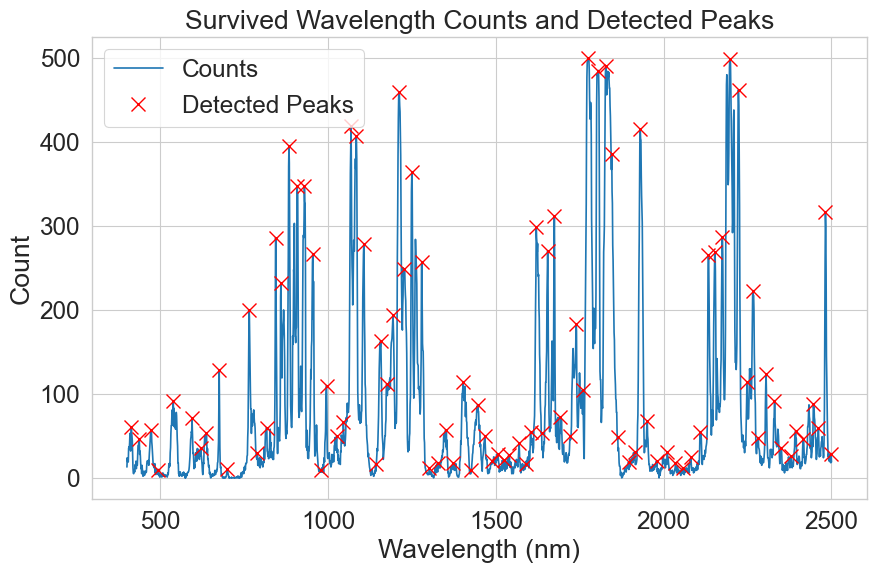

Peak-detected indices using SciPy: [1375, 1797, 1427, 1404, 1823, 811, 668, 1530, 683, 483, 1445, 850, 507, 529, 2082, 1274, 1220, 1775, 443, 706, 1254, 1753, 554, 1733, 879, 827, 459, 1866, 364, 793, 1339, 756, 275, 1905, 1002, 1848, 774, 595, 1359, 1930, 138, 2046, 1045, 1292, 194, 1551, 645, 13, 416, 2061, 950, 73, 1993, 1203, 1708, 1236, 237, 1067, 625, 1322, 1463, 1881, 36, 2016, 1169, 220, 1949, 1514, 1611, 389, 2099, 1105, 1138, 1978, 1681, 1123, 1088, 1579, 1495, 927, 972, 1635, 1188, 741, 901, 1657, 299, 92, 1026, 578]

Total combinations to test: 1

Combination 0: ['413.000', '436.000', '473.000', '492.000', '538.000', '594.000', '620.000', '637.000', '675.000', '699.000', '764.000', '789.000', '816.000', '843.000', '859.000', '883.000', '907.000', '929.000', '954.000', '978.000', '995.000', '1025.000', '1045.000', '1068.000', '1083.000', '1106.000', '1141.000', '1156.000', '1174.000', '1193.000', '1211.000', '1227.000', '1250.000', '1279.000', '1301.000', '1327.000', '1350.0

In [4]:
a, l, y_pred = c.accuracy_survived_wavelenghts(thr=None, rdm=False, all=False, model_type='PLS', wavelengths=None, learning_curve=False, pls_plot=False, peak_detection=True, peak_distance=15, peak_height=10, confusion_matrix_f=True)

import numpy as np
import pandas as pd

# Step 1: Find indices where predictions differ from true values
diff_indices = np.where(y_pred != c.y_test.flatten())[0]

# Step 2: Get the correct class values from c.y_test
correct_classes = c.y_test[diff_indices]

# Step 3: Get the corresponding Stress_weight values from the test index
stress_weights = list(c.index_testing.get_level_values('Stress_weight')[diff_indices])

# If you want to print or return the results
print("Mismatched indices:", diff_indices)
print("Correct class values:", correct_classes)
print("Corresponding Stress_weight values:", stress_weights)

In [5]:
for i in l:
    print(len(i))
    c.permutation_test(wavelengths=i)

90
